#### Basis of given features Build a model to check wheather en employeee will left the company or not 

## Import Basic Libreries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# collecting Data

In [2]:
hr = pd.read_csv('D:\\Datasets\\HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## get the no. of rows and no. of Columns in our data set.

In [3]:
print('Number of Rows in Dataset : ', hr.shape[0])
print('Number of Columns in Dataset : ', hr.shape[1])

Number of Rows in Dataset :  14999
Number of Columns in Dataset :  10


## Statistical Description od Collected Dataset

In [4]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## General information of Dataset

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### According to Dataset information features ('left', 'promotion_last_5years', 'Department', 'salary') are  int64 or object types
#### but they are categorical features . so we have to change them into categorical datatype

In [6]:
hr['left'] = hr['left'].astype('category')
hr['promotion_last_5years'] = hr['promotion_last_5years'].astype('category')
hr['Department'] = hr['Department'].astype('category')
hr['salary'] = hr['salary'].astype('category')

In [7]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null category
promotion_last_5years    14999 non-null category
Department               14999 non-null category
salary                   14999 non-null category
dtypes: category(4), float64(2), int64(4)
memory usage: 762.4 KB


#### As seen conversion of datatype can be reduse the memory space of Dataset

# Analysis data

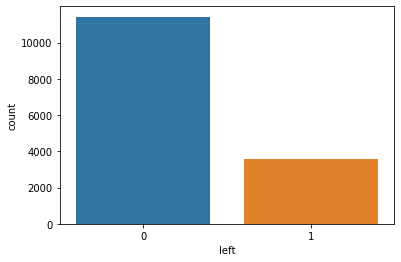

In [8]:
sns.countplot(x='left', data=hr)

#### upper graph told about total no. of employee left or not  
#### Arround 12000 employees has left their job 

## below graphs are for rationship with left employee with work accident 
#### most employee who left their job were not met with any accident at workplace.

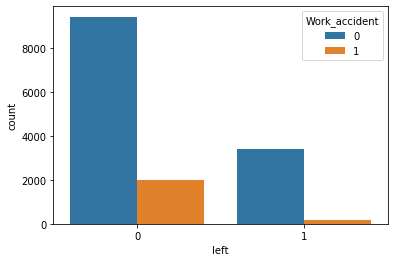

In [9]:
sns.countplot(x='left', hue='Work_accident', data=hr)

### visualize employee with Salary .
#### most of the employees who has left thier job are with low and medium salary

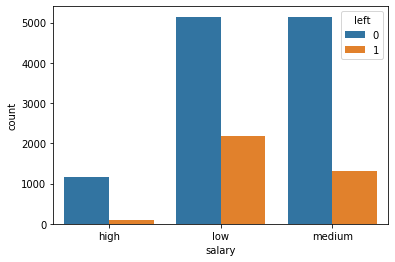

In [10]:
sns.countplot(x='salary', hue='left', data=hr)

#### Below shown Visualization tells us about the employees, who has left their job, has no promotion over 5 years.

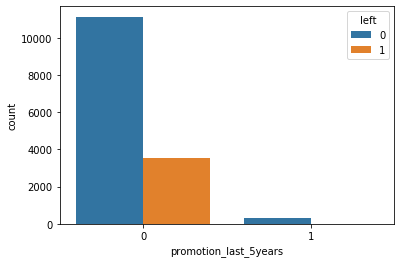

In [11]:
sns.countplot(x='promotion_last_5years', hue='left', data=hr)

### so we can say that the factor responsible for leaving the company also based on work accident, salary , and promotion features

In [12]:
### take out the target data from real dataset

In [13]:
hr = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'Work_accident', 'promotion_last_5years', 'salary', 'left' ]]

In [14]:
hr.head(3)

,satisfaction_level,last_evaluation,number_project,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,0,0,low,1
1,0.80,0.86,5,0,0,medium,1
2,0.11,0.88,7,0,0,medium,1


In [15]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 7 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null category
salary                   14999 non-null category
left                     14999 non-null category
dtypes: category(3), float64(2), int64(2)
memory usage: 513.0 KB


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
LE = LabelEncoder()

### encoding the categorical data into int. 
### 0 will be assign to 'high' salary
### 1 will be assign to 'normal' salary
### 2 will be assign to 'low' salary

In [18]:
hr['promotion_last_5years'] = LE.fit_transform(hr['promotion_last_5years'])
hr['salary'] = LE.fit_transform(hr['salary'])
hr['left'] = LE.fit_transform(hr['left'])

hr.describe()

,satisfaction_level,last_evaluation,number_project,Work_accident,promotion_last_5years,salary,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,0.144610,0.021268,1.347290,0.238083
std,0.248631,0.171169,1.232592,0.351719,0.144281,0.625819,0.425924
min,0.090000,0.360000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,0.000000,0.000000,1.000000,0.000000
50%,0.640000,0.720000,4.000000,0.000000,0.000000,1.000000,0.000000
75%,0.820000,0.870000,5.000000,0.000000,0.000000,2.000000,0.000000
max,1.000000,1.000000,7.000000,1.000000,1.000000,2.000000,1.000000


### Values of independent variable stored in variable x
### Values of dependent variable stored in variable y

In [19]:
x = hr.iloc[:, :-1].values
y = hr.iloc[:,-1].values

### let's make the same range of each value of x using sklean.preprocesing.StandardScalar() as follows

In [20]:
from sklearn.preprocessing import StandardScaler


In [21]:
ss = StandardScaler()

In [22]:
x = ss.fit_transform(x)

### Split the data into training and testing Dataset 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)


### import the LogisticRegression 

In [25]:
from sklearn.linear_model import LogisticRegression

### Call the imported model

In [26]:
lr = LogisticRegression(C =0.01, solver='liblinear', )

### fit the model using traning data

In [27]:
lr.fit(train_x, train_y,)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lr.coef_

array([[-0.92582028,  0.16090868, -0.1779827 , -0.4421279 , -0.16526304,
         0.01459512]])

In [29]:
lr.intercept_

array([-1.35291451])

### predict the values for test data

In [30]:
y_pred = lr.predict(test_x)

### makeing a dataframe of actual values, predicted values

In [31]:
df = pd.DataFrame({ 'Actual values': test_y,
                    'Predicted values' : y_pred   
})
df.head(2)

,Actual values,Predicted values
0,1,0
1,0,0


#### draw confusion matrix for getting TRUE Positive & Negative values ans also for type-1 & type-2 Error

In [32]:
from sklearn.metrics import confusion_matrix

[[2119  147]
 [ 557  177]]


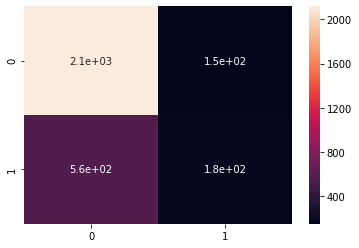

In [33]:
cm = confusion_matrix(test_y, y_pred)
print(cm)
sns.heatmap(cm, annot=True, )

In [34]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, classification_report, f1_score, jaccard_similarity_score
                    

### Score values

In [35]:
score = pd.DataFrame({'Score' : [accuracy_score(test_y, y_pred),
                         precision_score(test_y, y_pred),
                         precision_score(test_y, y_pred,pos_label=0), 
                         recall_score(test_y, y_pred),
                         recall_score(test_y, y_pred, pos_label=0),
                         f1_score(test_y, y_pred),
                         jaccard_similarity_score(test_y, y_pred)
                        ]},
             
             index=['Accuracy Score', 'Precision Score (Label 1)', 'Precision Score (Label 0)', 
                    'Recall Score (Label 1)','Recall Score (Label 0)', 'F-1 score','jaccard_similarity_score'])
score

C:\Users\Sunny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


,Score
Accuracy Score,0.765333
Precision Score (Label 1),0.546296
Precision Score (Label 0),0.791854
Recall Score (Label 1),0.241144
Recall Score (Label 0),0.935128
F-1 score,0.334594
jaccard_similarity_score,0.765333


In [36]:
print(classification_report(test_y, y_pred,))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2266
           1       0.55      0.24      0.33       734

    accuracy                           0.77      3000
   macro avg       0.67      0.59      0.60      3000
weighted avg       0.73      0.77      0.73      3000

